In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rcParams["font.size"] =12
plt.rcParams['xtick.labelsize'] =12.
plt.rcParams['ytick.labelsize'] =12.
plt.rcParams['axes.unicode_minus'] = False

CHART_NAME = 'seabornWelfare'
cnt, PNG, UNDERBAR = 0, '.png', '_'
filename = '../data/welfare_python.csv'

import pandas as pd
welfare = pd.read_csv(filename, encoding='utf-8')

# 데이터 전처리

In [2]:
# 성별 

#welfare['gender'] = welfare['gender'].astype(str)

welfare.loc[welfare['gender'] == 1, ['gender']] = '남성'
welfare.loc[welfare['gender'] == 2, ['gender']] = '여성'

thisyear = 2020
welfare['age'] = thisyear - welfare['birth'] + 1

C:\Users\KH302\AppData\Local\Temp\ipykernel_9352\146381782.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '남성' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  welfare.loc[welfare['gender'] == 1, ['gender']] = '남성'


In [3]:
# 결혼 유무

def setMarriage( x ):
    if x == 1:
        return '결혼'
    elif x == 3:
        return '이혼'
    else:
        return '무응답' #결측치

welfare['marriage'] = welfare['marriage'].apply(setMarriage)

In [4]:
# 월급

#print('\n# 월급 결측치 개수 구하기 before')
#print(sum(welfare['income'].isnull()))
#12030

welfare.loc[welfare['income'].isnull(), 'income'] = welfare['income'].mean()

print('\n# 월급 결측치 개수 구하기 after')
print(sum(welfare['income'].isnull()))


# 월급 결측치 개수 구하기 after
0


In [5]:
# 종교

def setReligion_txt ( x ):
    if int(x) == 1:
        return '있음'
    else:
        return '없음'

print(welfare['religion'].unique())

welfare['religion'] = welfare['religion'].apply(setReligion_txt)

[2 1]


In [6]:
# 직업

job_file = '../data/welfare_job.csv'
jobframe = pd.read_csv(job_file, encoding='cp949')

welfare['code_job'].unique()

array([  nan,  942.,  762.,  530.,  999.,  312.,  254.,  510.,  286.,
        521.,  773.,  314.,  941.,  951.,  274.,  873.,  320.,  952.,
        151.,  152.,  772.,  852.,  442.,  991.,  422.,  313.,  710.,
        522.,  399.,  753.,  851.,  235.,  231.,  311.,  721.,  953.,
        930.,  863.,  910.,  392.,  761.,  922.,  285.,  875.,  862.,
        421.,  243.,  223.,  252.,  259.,  771.,  135.,  245.,  221.,
        751.,  251.,  141.,  722.,  246.,  289.,  281.,  741.,  261.,
        247.,  441.,  864.,  222.,  411.,  799.,  743.,  780.,  149.,
        891.,  823.,  159.,  248.,  874.,  892.,  241.,  239.,  791.,
        271.,  871.,  391.,  620.,  131.,  431.,  811.,  272.,  429.,
        213.,  842.,  283.,  284.,  134.,  611.,  236.,  792.,  855.,
        234.,  861.,  921.,  253.,  752.,  841.,  330.,  233.,  899.,
        139.,  432.,  212.,  423.,  730.,  273.,  211.,  412.,  120.,
        992.,  854.,  822.,  831.,  853.,  832.,  612.,  821.,  613.,
        774.,  132.,

In [7]:
print('\n# merge() 함수의 left_on과 right_on 사용하기')
welfare = pd.merge(welfare, jobframe, left_on='code_job', right_on='code_job')
welfare


# merge() 함수의 left_on과 right_on 사용하기


,gender,birth,marriage,religion,code_job,income,code_religion,age,job
0,남성,1948,무응답,없음,942.0,120.000000,1,73,경비원 및 검표원
1,남성,1942,이혼,있음,762.0,200.000000,1,79,전기공
2,남성,1962,결혼,있음,530.0,241.619016,1,59,방문 노점 및 통신 판매 관련 종사자
3,남성,1962,무응답,없음,999.0,40.000000,1,59,기타 서비스관련 단순 종사원
4,남성,1978,결혼,없음,312.0,350.000000,1,43,경영관련 사무원
...,...,...,...,...,...,...,...,...,...
7524,여성,1934,결혼,없음,611.0,241.619016,6,87,작물재배 종사자
7525,남성,1956,결혼,없음,743.0,187.660000,6,65,용접원
7526,여성,1958,결혼,있음,611.0,241.619016,6,63,작물재배 종사자
7527,남성,1967,결혼,있음,874.0,241.619016,5,54,물품이동 장비 조작원


In [8]:
#welfare = pd.merge(welfare,
#                   jobframe[['code_job', 'job']],
#                   on='code_job',
#                   how='left')
#welfare

In [9]:
print("welfare['code_religion'].unique()")
print(welfare['code_religion'].unique())

welfare['code_religion'].unique()
[1 7 2 5 6 3 4]


In [10]:
# 지역
def setReligion_txt (x):
    if int(x) == 1:
        return '서울'
    elif int(x) == 2:
        return '수도권'
    elif int(x) == 3:
        return '부산/경남/울산'
    elif int(x) ==4:
        return '대구/경북'
    elif int(x) ==5:
        return '대전/충남'
    elif int(x) ==6:
        return '강원/충북'
    elif int(x) ==7:
        return '광주/전남/전북/제주도'

welfare['code_religion'] = welfare['code_religion'].apply(setReligion_txt)

In [11]:
# 나이
def newAge(x):
    if x < 30:
        return '청년'
    elif x >= 30 and x < 60:
        return '중년'
    else:
        return '노년'

welfare['ageg'] = welfare['age'].apply(newAge)
welfare[['age', 'ageg']].head()

,age,ageg
0,73,노년
1,79,노년
2,59,중년
3,59,중년
4,43,중년


In [12]:
# 한글 변경
col_mapping = {'gender':'성별', 'birth':'생일', 'marriage':'결혼 유무', 'religion':'종교 유무', 'code_job':'직업 코드', 'income':'소득', 'code_religion':'지역구', 'age':'나이', 'job':'직업', 'ageg':'연령대'}
welfare = welfare.rename(columns = col_mapping)
welfare.to_csv('welfareClean.csv', index=False, encoding='cp949')

print(welfare.columns)

Index(['성별', '생일', '결혼 유무', '종교 유무', '직업 코드', '소득', '지역구', '나이', '직업', '연령대'], dtype='object')


In [13]:
welfare.head(10)

,성별,생일,결혼 유무,종교 유무,직업 코드,소득,지역구,나이,직업,연령대
0,남성,1948,무응답,없음,942.0,120.000000,서울,73,경비원 및 검표원,노년
1,남성,1942,이혼,있음,762.0,200.000000,서울,79,전기공,노년
2,남성,1962,결혼,있음,530.0,241.619016,서울,59,방문 노점 및 통신 판매 관련 종사자,중년
3,남성,1962,무응답,없음,999.0,40.000000,서울,59,기타 서비스관련 단순 종사원,중년
4,남성,1978,결혼,없음,312.0,350.000000,서울,43,경영관련 사무원,중년
5,여성,1975,결혼,없음,254.0,200.000000,서울,46,문리 기술 및 예능 강사,중년
6,여성,1942,결혼,있음,510.0,150.000000,서울,79,영업 종사자,노년
7,남성,1964,무응답,없음,530.0,241.619016,서울,57,방문 노점 및 통신 판매 관련 종사자,중년
8,남성,1975,무응답,있음,286.0,241.619016,서울,46,스포츠 및 레크레이션 관련 전문가,중년
9,남성,1978,결혼,없음,521.0,241.619016,서울,43,매장 판매 종사자,중년


In [14]:
# describe() 간략한 통계 정보
welfare.describe()

,생일,직업 코드,소득,나이
count,7529.000000,7529.000000,7529.000000,7529.000000
mean,1964.012087,591.243724,241.619016,56.987913
std,15.524029,255.793317,144.679991,15.524029
min,1919.000000,111.000000,0.000000,23.000000
25%,1952.000000,314.000000,162.600000,45.000000
50%,1965.000000,611.000000,241.619016,56.000000
75%,1976.000000,863.000000,241.619016,69.000000
max,1998.000000,1012.000000,2400.000000,102.000000


In [15]:
print(welfare['결혼 유무'].unique())
print(welfare['종교 유무'].unique())
print(welfare['지역구'].unique())
print(welfare['직업'].unique())
print(welfare['연령대'].unique())

['무응답' '이혼' '결혼']
['없음' '있음']
['서울' '광주/전남/전북/제주도' '수도권' '대전/충남' '강원/충북' '부산/경남/울산' '대구/경북']
['경비원 및 검표원' '전기공' '방문 노점 및 통신 판매 관련 종사자' '기타 서비스관련 단순 종사원' '경영관련 사무원'
 '문리 기술 및 예능 강사' '영업 종사자' '스포츠 및 레크레이션 관련 전문가' '매장 판매 종사자' '건축마감관련 기능 종사자'
 '비서 및 사무 보조원' '청소원 및 환경 미화원' '가사 및 육아 도우미' '기술영업 및 중개 관련 종사자' '자동차 운전원'
 '금융 및 보험관련 사무 종사자' '음식관련 단순 종사원' '판매 및 운송 관리자' '고객서비스 관리자' '건설관련 기능 종사자'
 '냉 난방 관련 설비 조작원' '음식서비스 종사자' '농립어업관련 단순 종사원' '이 미용 및 관련 서비스 종사자'
 '회계 및 경리 사무원' '식품가공관련 기능 종사자' '상품 대여 종사자' '고객 상담 및 기타 사무원'
 '기계장비 설치 및 정비원' '금속공작기계 조작원' '전기 전자 및 기계 공학 기술자 및 시험원'
 '건축 및 토목 공학 기술자 및 시험원' '행정 사무원' '섬유 및 가죽 관련 기능 종사자' '판매관련 단순 종사원'
 '제조관련 단순 종사원' '전기 전자 부품 및 제품 제조장치 조작원' '건설 및 광업 단순 종사원' '여행 안내 및 접수 사무원'
 '전기 및 전자기기 설치 및 수리원' '배달원' '디자이너' '건설 및 채굴 기계운전원' '전기 및 전자 설비 조작원'
 '의료 복지 관련 서비스 종사자' '간호사' '정보 시스템 운영자' '학교 교사' '기타 교육 전문가' '건설구조관련 기능 종사자'
 '정보통신관련 관리자' '치료사 및 의료기사' '컴퓨터 하드웨어 및 통신공학 전문가' '자동차 정비원' '대학 교수 및 강사'
 '건설 전기 및 생산 관련 관리자' '의복 제조관련 기능 종사자' '보건의료관련 종사자' '매니저 및 기타 문화 예술 관련 종사자'
 

In [16]:
# filesave 함수 - 그래프에 대하여 이미지 파일로 저장
def FileSave():
    global cnt
    cnt += 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi=400)
    print(savefile + '파일이 저장되었습니다.')
# end def FileSave():

In [17]:
print('결혼 유무 빈도')
result = welfare.groupby('결혼 유무')['결혼 유무'].count()
result

결혼 유무 빈도


결혼 유무
결혼     5307
무응답    1803
이혼      419
Name: 결혼 유무, dtype: int64

seabornWelfare_01.png파일이 저장되었습니다.


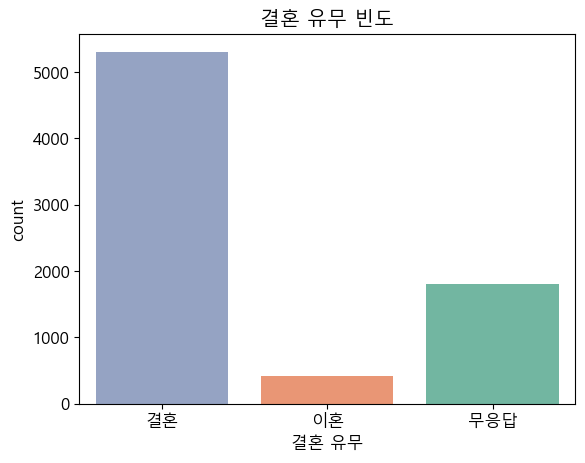

In [18]:
import seaborn as sns

ORDERING = ['결혼','이혼','무응답']
plt.figure()
plt.title('결혼 유무 빈도')
sns.countplot(
    x='결혼 유무', 
    data=welfare, 
    order=ORDERING, 
    hue='결혼 유무', 
    palette='Set2', 
    legend=False
)
FileSave()

In [19]:
print('결혼 유무 vs 종교 유무 빈도')
result = welfare.groupby(['결혼 유무', '종교 유무'])['결혼 유무'].count()
print(result)

결혼 유무 vs 종교 유무 빈도
결혼 유무  종교 유무
결혼     없음       2778
       있음       2529
무응답    없음        932
       있음        871
이혼     없음        247
       있음        172
Name: 결혼 유무, dtype: int64


seabornWelfare_02.png파일이 저장되었습니다.


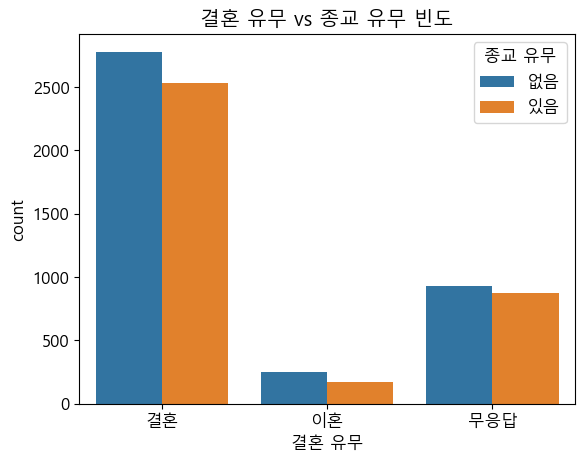

In [20]:
plt.figure()
plt.title('결혼 유무 vs 종교 유무 빈도')

sns.countplot(x='결혼 유무', hue='종교 유무', data=welfare, order=ORDERING)
FileSave()

seabornWelfare_03.png파일이 저장되었습니다.


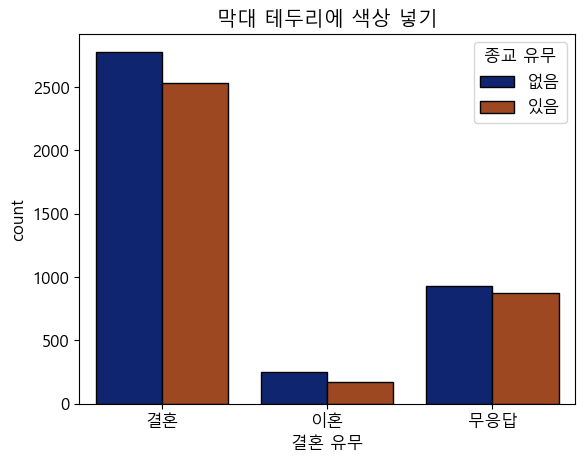

In [21]:
plt.figure()
plt.title('막대 테두리에 색상 넣기')
sns.countplot(x='결혼 유무', 
              hue='종교 유무',
              data=welfare,
              order=ORDERING, 
              palette="dark",
              linewidth=1,
              edgecolor='black'
             )
FileSave()

seabornWelfare_04.png파일이 저장되었습니다.


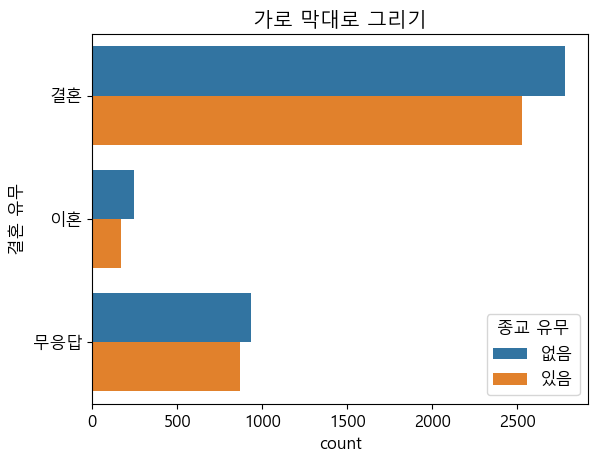

In [22]:
plt.figure()
plt.title('가로 막대로 그리기')
sns.countplot(y='결혼 유무', hue='종교 유무', data=welfare, order=ORDERING)
FileSave()

seabornWelfare_05.png파일이 저장되었습니다.


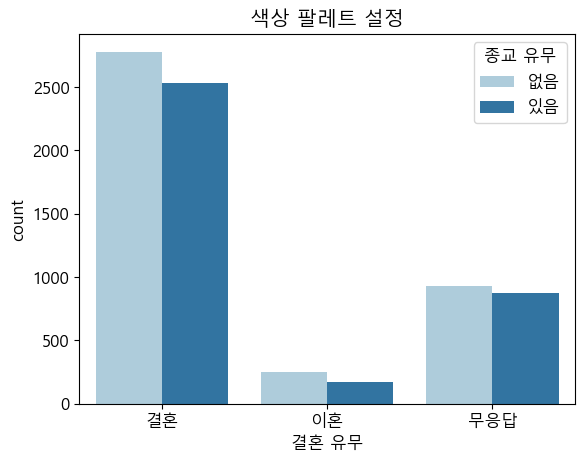

In [23]:
plt.figure()
plt.title('색상 팔레트 설정')
sns.countplot(x='결혼 유무', hue='종교 유무', palette='Paired', data = welfare, order=ORDERING)
FileSave()

seabornWelfare_06.png파일이 저장되었습니다.


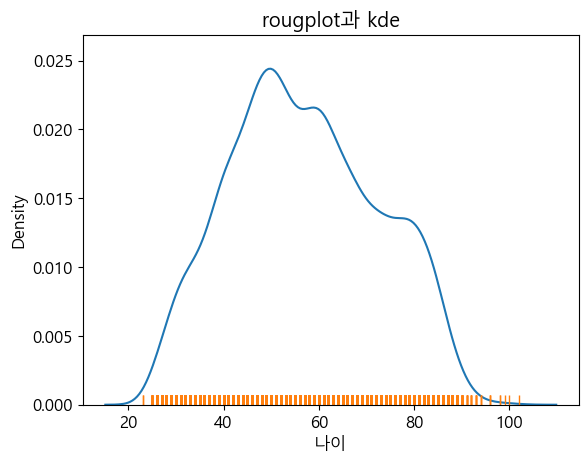

In [24]:
x = welfare['나이']

plt.figure()
plt.title('rougplot과 kde')
#sns.distplot(x, rug = True, hist = False, kde = True)
sns.kdeplot(x)      # 밀도 그래프 (kde=True 효과)
sns.rugplot(x)      # 하단 카펫 그래프 (rug=True 효과)
FileSave()

seabornWelfare_07.png파일이 저장되었습니다.


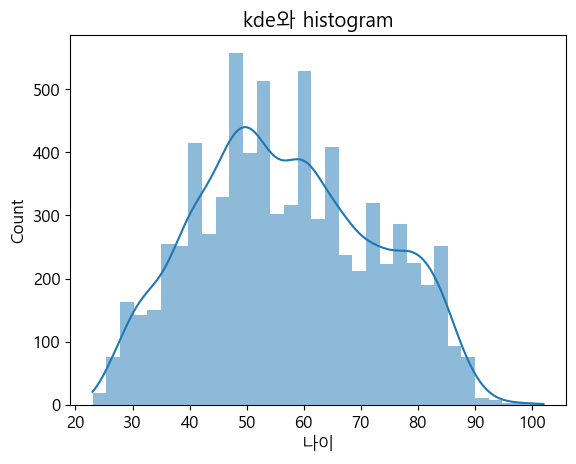

In [25]:
plt.figure()
plt.title('kde와 histogram')
#sns.distplot(x, rug=False, hist=True, kde=True, label='asdf')
sns.histplot(x, kde=True, label='asdf', edgecolor='none')
FileSave()

seabornWelfare_08.png파일이 저장되었습니다.


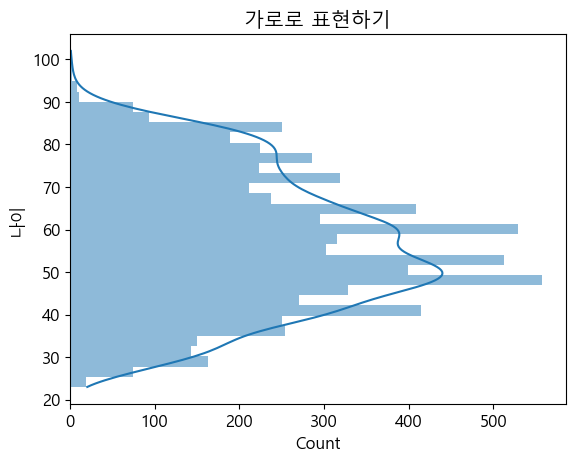

In [26]:
plt.figure()
plt.title('가로로 표현하기')
#sns.distplot(x, vertical=True)
sns.histplot(y=x, kde=True, edgecolor='none')
FileSave()

seabornWelfare_09.png파일이 저장되었습니다.


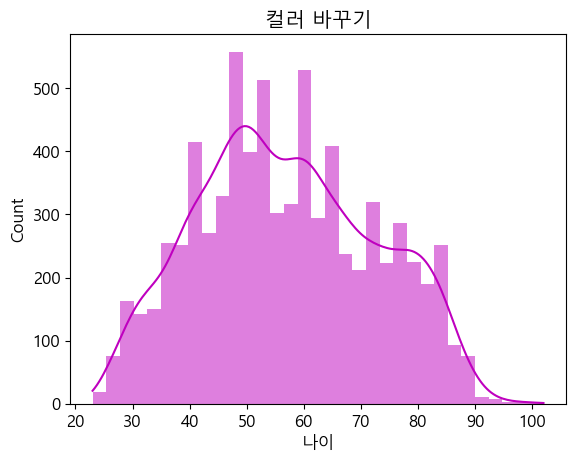

In [27]:
plt.figure()
plt.title('컬러 바꾸기')
#sns.distplot(x, color="m")
sns.histplot(x, color="m", kde=True, edgecolor='none')
FileSave()

In [28]:
pivot = welfare.pivot_table(index='성별', columns='결혼 유무', values='나이')
print('pivot_table을 이용한 시각화')
pivot

pivot_table을 이용한 시각화


결혼 유무,결혼,무응답,이혼
성별,,,
남성,59.806978,43.629973,58.57767
여성,58.890179,53.913251,57.28169


seabornWelfare_10.png파일이 저장되었습니다.


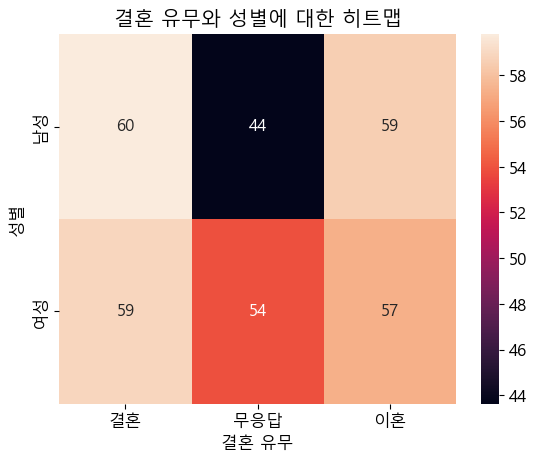

In [29]:
plt.figure()
plt.title('결혼 유무와 성별에 대한 히트맵')
sns.heatmap(data=pivot, annot=True)
FileSave()

In [30]:
# 상관 관계
cor = welfare.corr(numeric_only=True)
print('상관 관계 시각화')
cor

상관 관계 시각화


,생일,직업 코드,소득,나이
생일,1.000000,-0.287829,0.093783,-1.000000
직업 코드,-0.287829,1.000000,-0.287414,0.287829
소득,0.093783,-0.287414,1.000000,-0.093783
나이,-1.000000,0.287829,-0.093783,1.000000


seabornWelfare_11.png파일이 저장되었습니다.


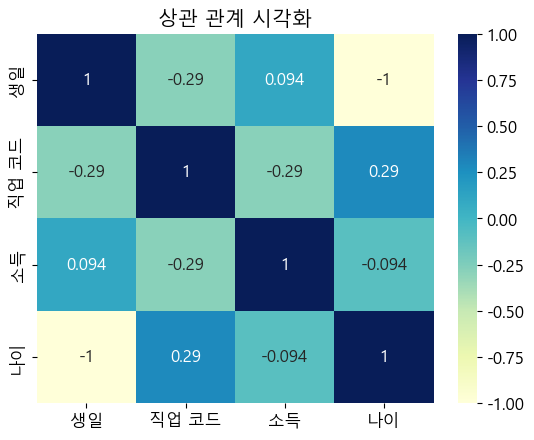

In [31]:
plt.figure()
plt.title('상관 관계 시각화')
sns.heatmap(data=cor, annot=True, cmap="YlGnBu")
FileSave()

seabornWelfare_12.png파일이 저장되었습니다.


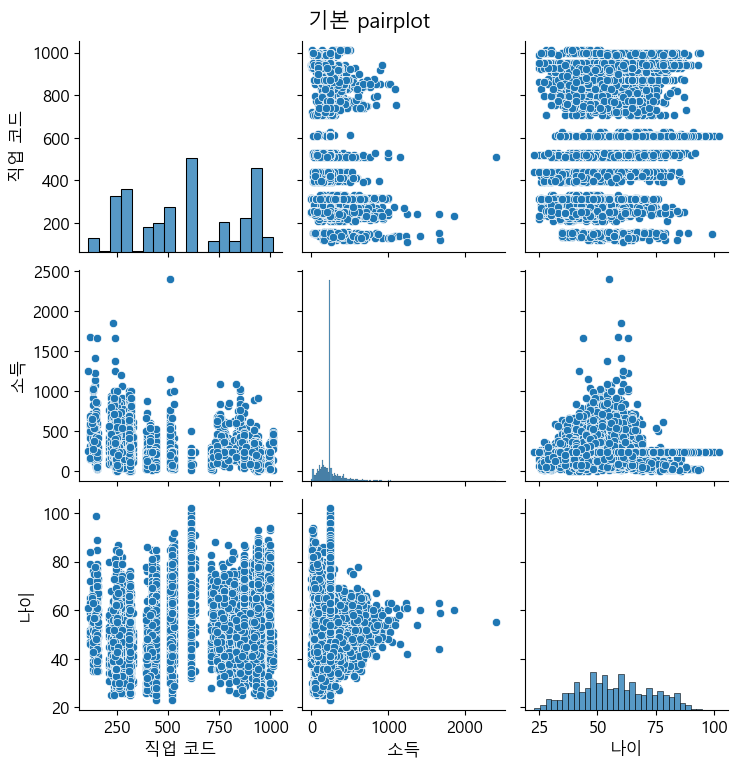

In [32]:
newwelfare = welfare.loc[:, ['직업 코드', '소득', '나이', '결혼 유무']]

#plt.figure()
#plt.title('기본 pairplot')
#sns.pairplot(data=newwelfare)
# --- new --- 
g = sns.pairplot(data=newwelfare)
g.fig.suptitle('기본 pairplot', y=1.02, fontsize=15)

FileSave()

seabornWelfare_13.png파일이 저장되었습니다.


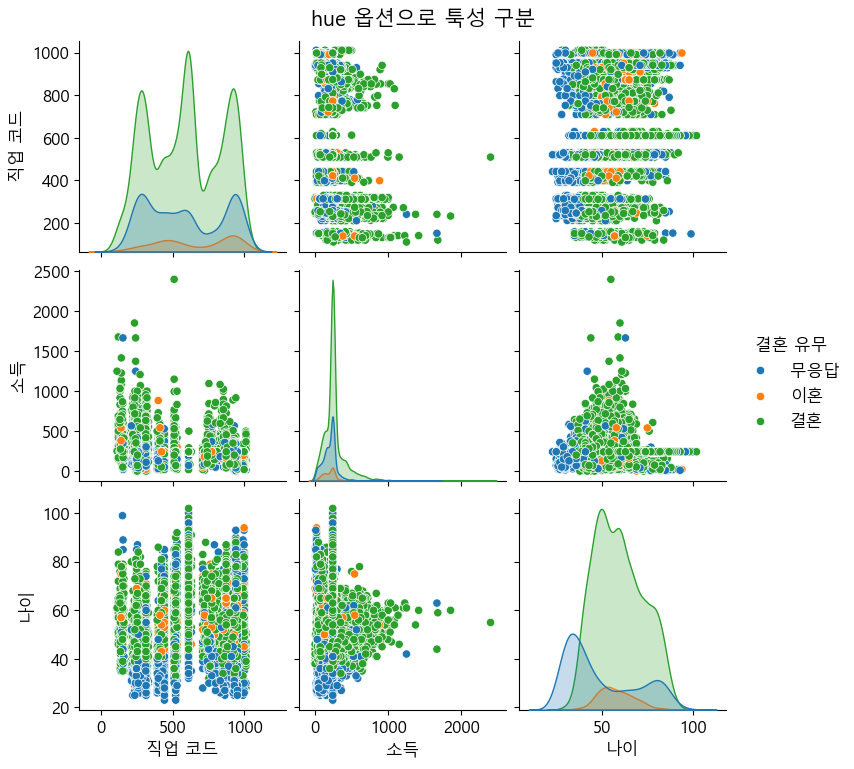

In [33]:
g = sns.pairplot(data=newwelfare, hue='결혼 유무')
g.fig.suptitle('hue 옵션으로 툭성 구분', y=1.02, fontsize=15)
FileSave()

seabornWelfare_14.png파일이 저장되었습니다.


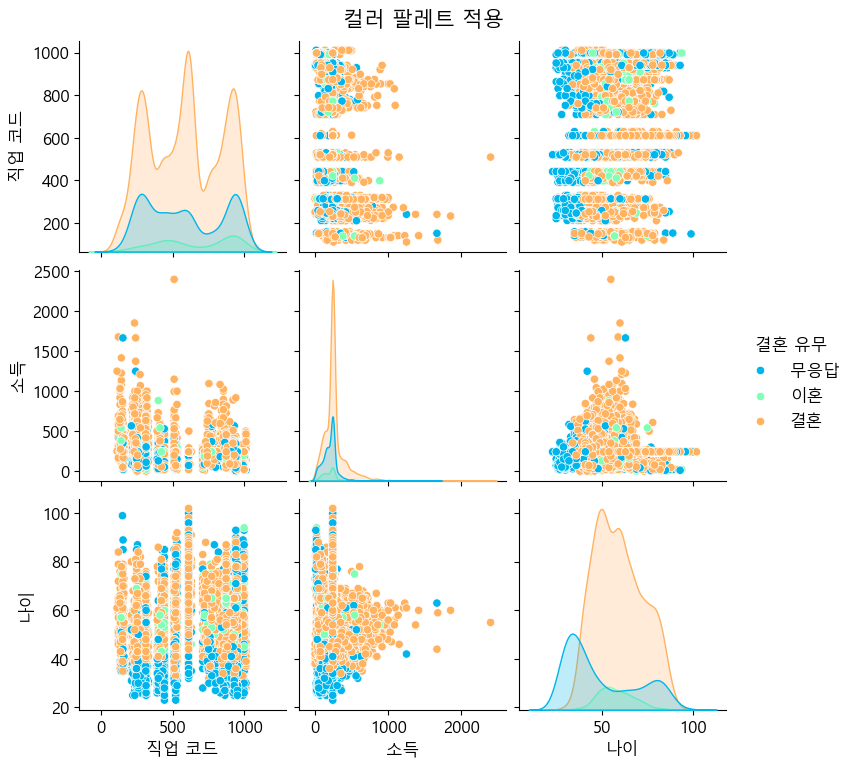

In [34]:
g = sns.pairplot(data=newwelfare, hue='결혼 유무', palette="rainbow")
g.fig.suptitle('컬러 팔레트 적용', y=1.02, fontsize=15)
FileSave()

seabornWelfare_15.png파일이 저장되었습니다.


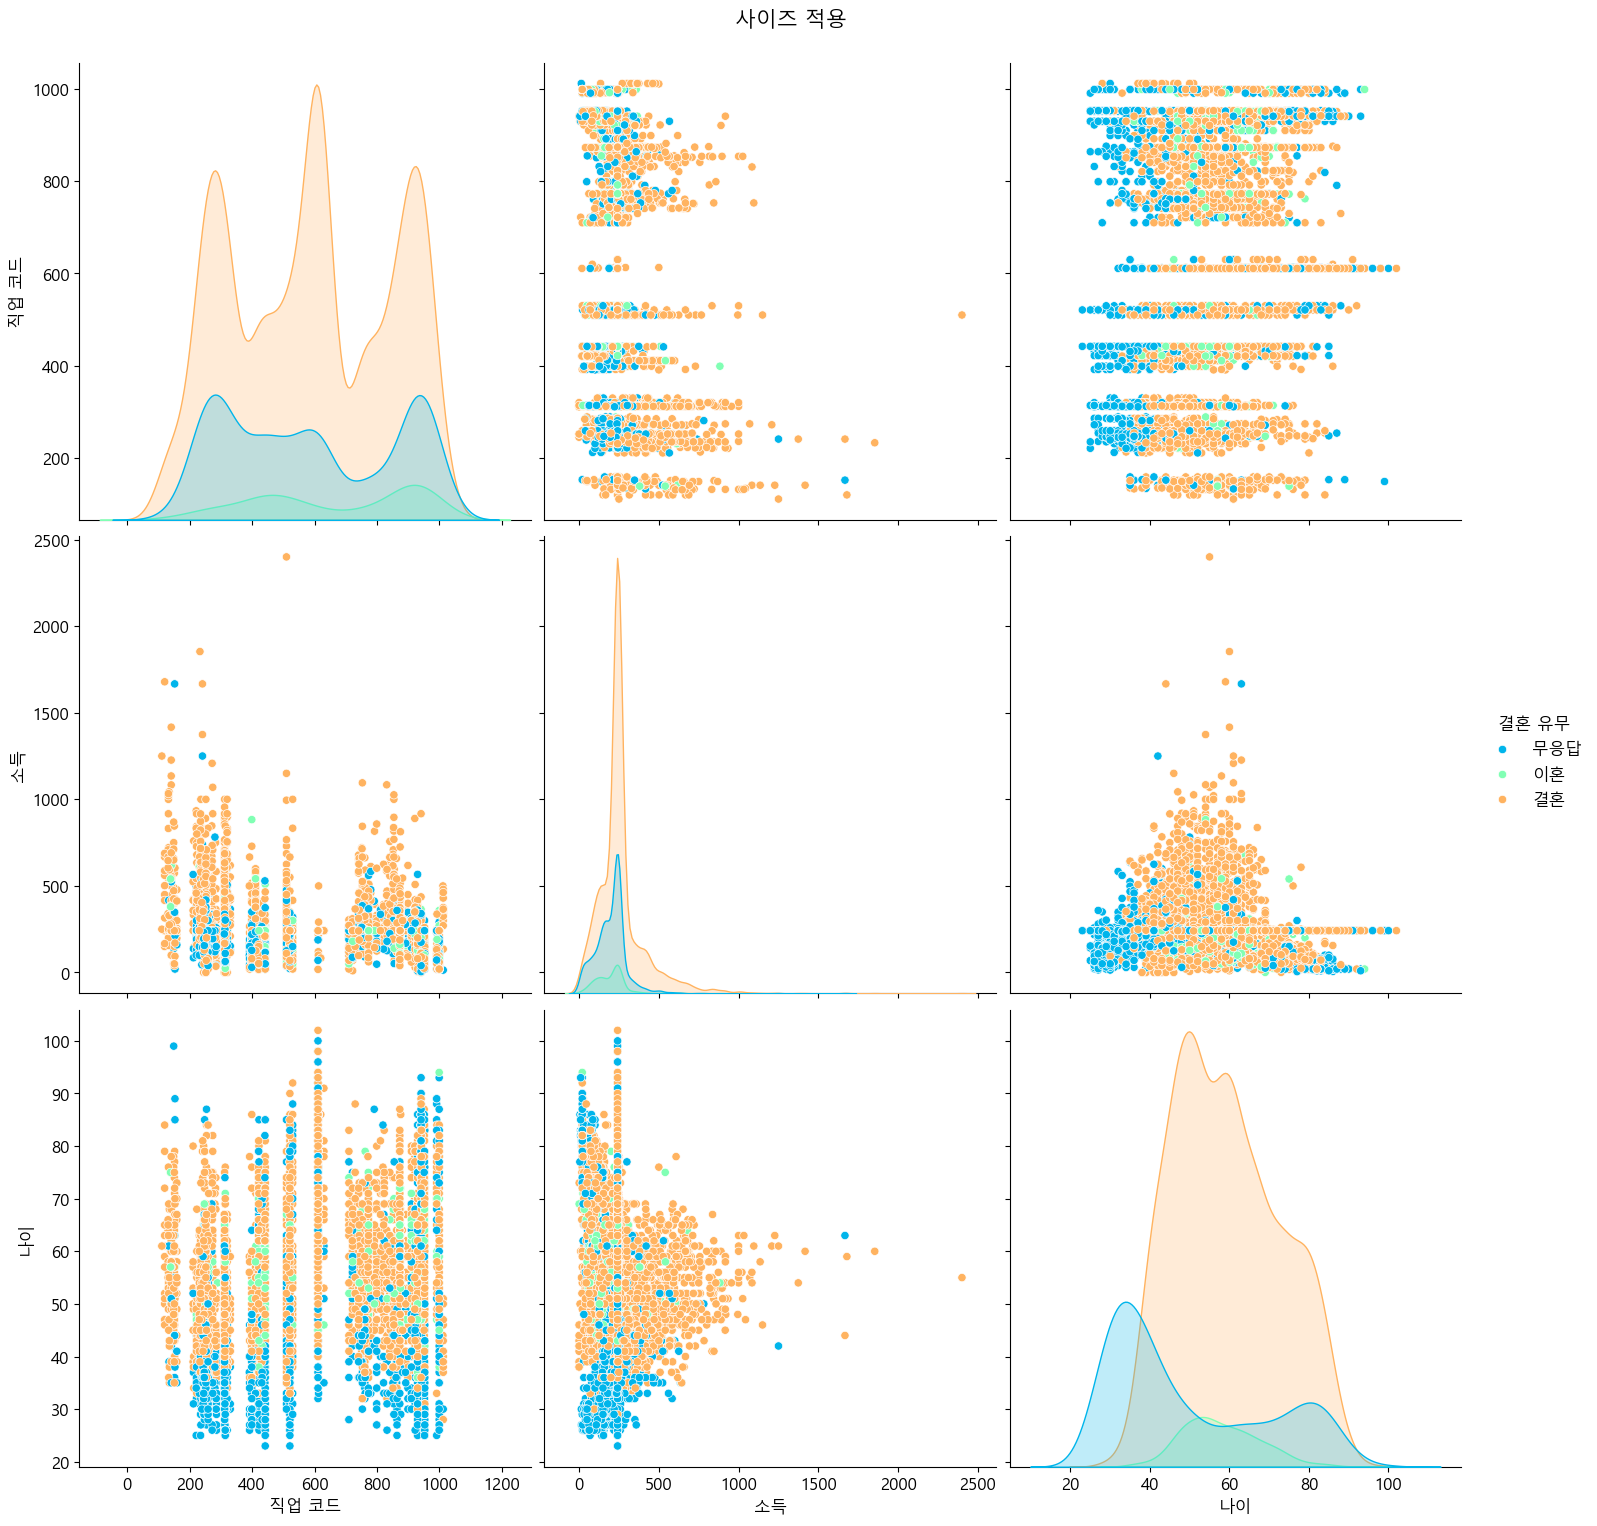

In [35]:
g = sns.pairplot(data=newwelfare, hue='결혼 유무', palette="rainbow", height=5)
g.fig.suptitle('사이즈 적용', y=1.02, fontsize=15)
FileSave()

In [36]:
print("welfare['나이'].describe()")
print(welfare['나이'].describe())

welfare['나이'].describe()
count    7529.000000
mean       56.987913
std        15.524029
min        23.000000
25%        45.000000
50%        56.000000
75%        69.000000
max       102.000000
Name: 나이, dtype: float64


seabornWelfare_16.png파일이 저장되었습니다.


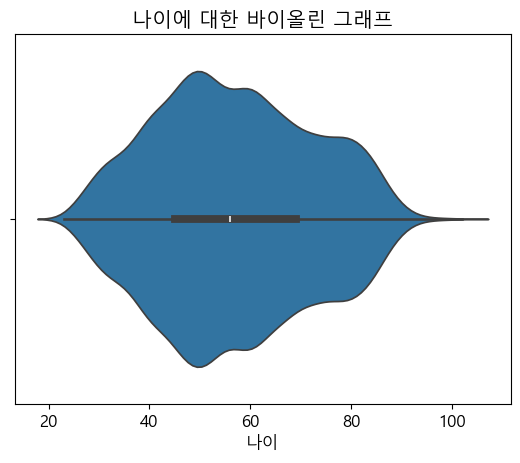

In [37]:
plt.figure()
plt.title('나이에 대한 바이올린 그래프')
sns.violinplot(x='나이', data=welfare)
FileSave()

seabornWelfare_17.png파일이 저장되었습니다.


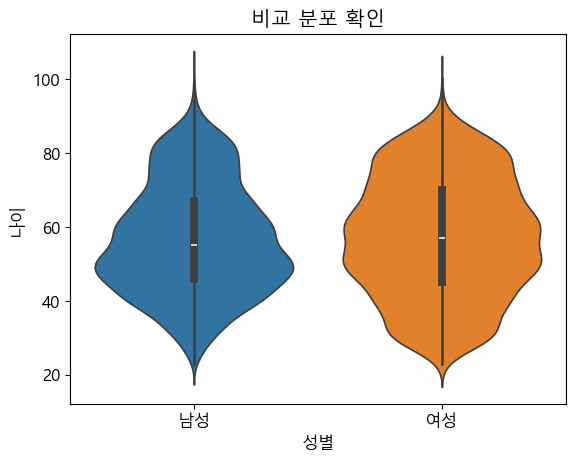

In [38]:
plt.figure()
plt.title('비교 분포 확인')
sns.violinplot(x='성별', y='나이', data=welfare, hue='성별')
FileSave()

seabornWelfare_18.png파일이 저장되었습니다.


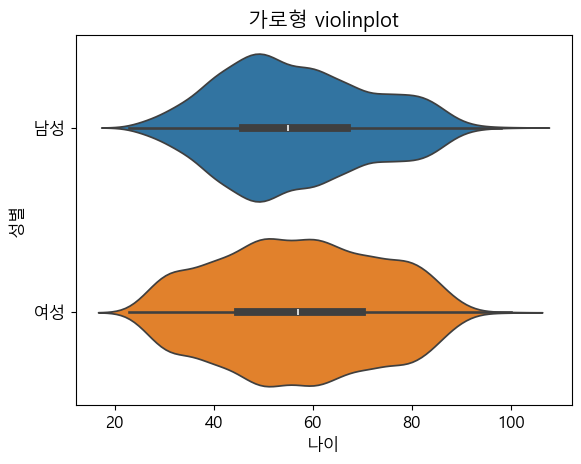

In [39]:
plt.figure()
plt.title('가로형 violinplot')
sns.violinplot(y='성별', x='나이', data=welfare, hue='성별')
FileSave()

seabornWelfare_19.png파일이 저장되었습니다.


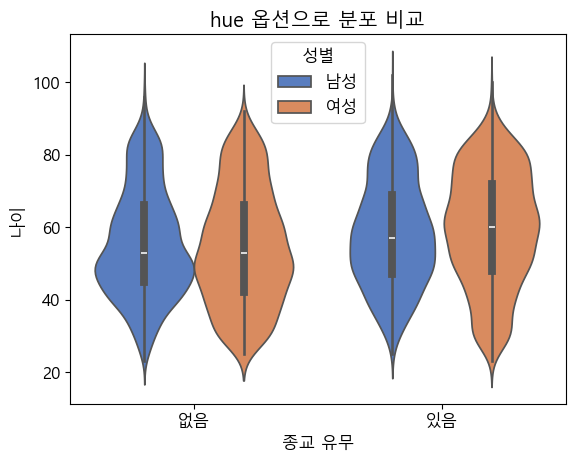

In [40]:
plt.figure()
plt.title('hue 옵션으로 분포 비교')
sns.violinplot(x='종교 유무', y='나이', hue='성별', data=welfare, palette="muted")
FileSave()

seabornWelfare_20.png파일이 저장되었습니다.


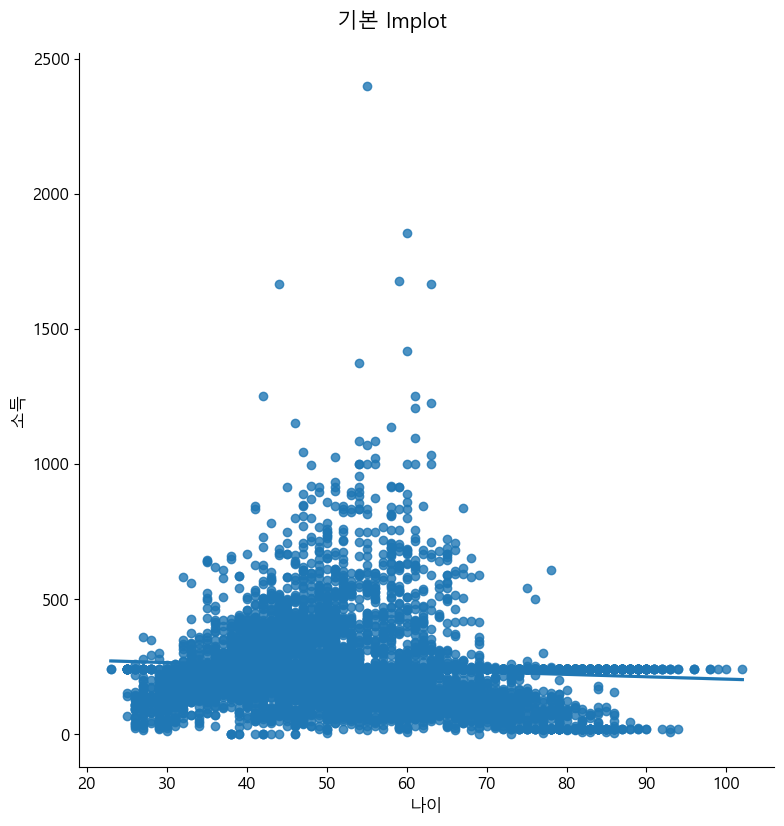

In [41]:
#plt.figure()
#plt.title('기본 lmplot')
#sns.lmplot(x='나이', y='소득', height=8, data=welfare)
# ----------    new   -----------
g = sns.lmplot(x='나이', y='소득', height=8, data=welfare)
g.fig.suptitle('기본 lmplot', y=1.03, fontsize=15)
FileSave()

seabornWelfare_21.png파일이 저장되었습니다.


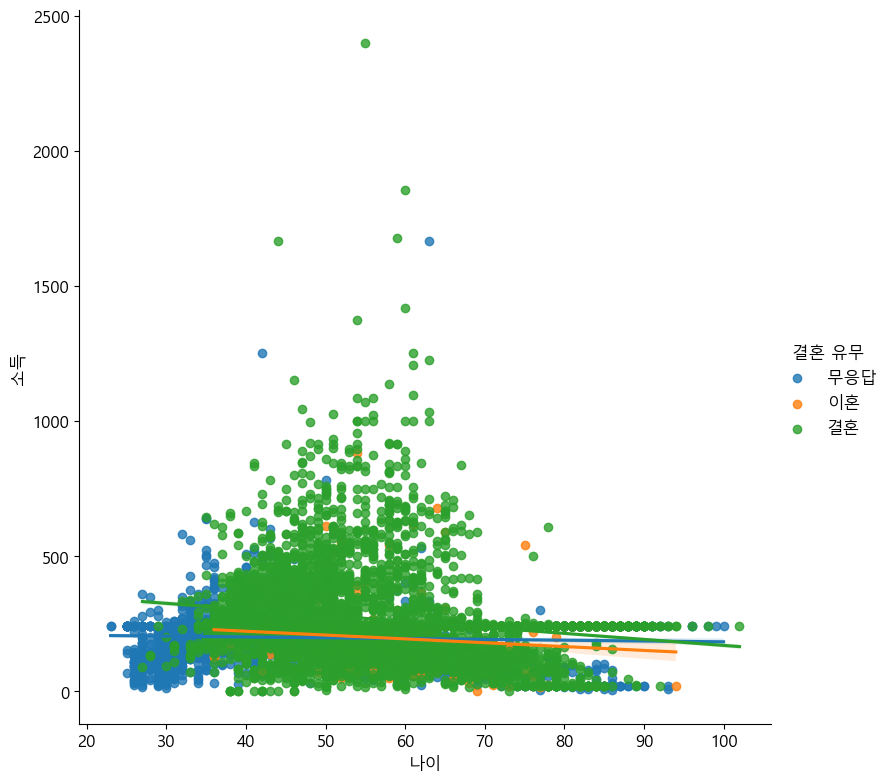

In [42]:
sns.lmplot(x='나이', y='소득', hue='결혼 유무', height=8, data=welfare)
FileSave()

seabornWelfare_22.png파일이 저장되었습니다.


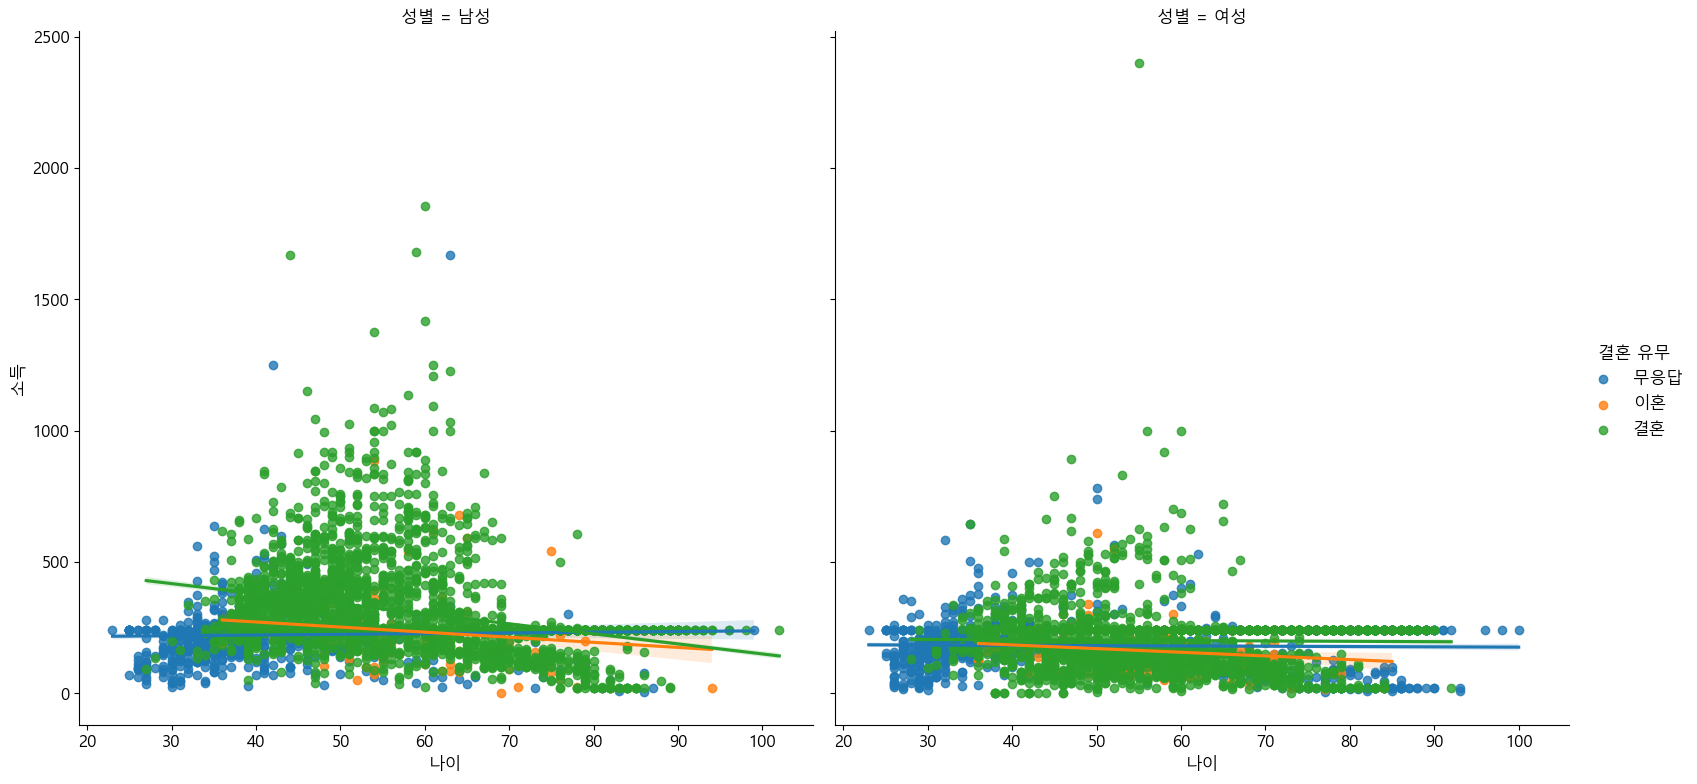

In [43]:
sns.lmplot(x='나이', y='소득', hue='결혼 유무', col='성별', col_wrap=2, height=8, data=welfare)
FileSave()

seabornWelfare_23.png파일이 저장되었습니다.


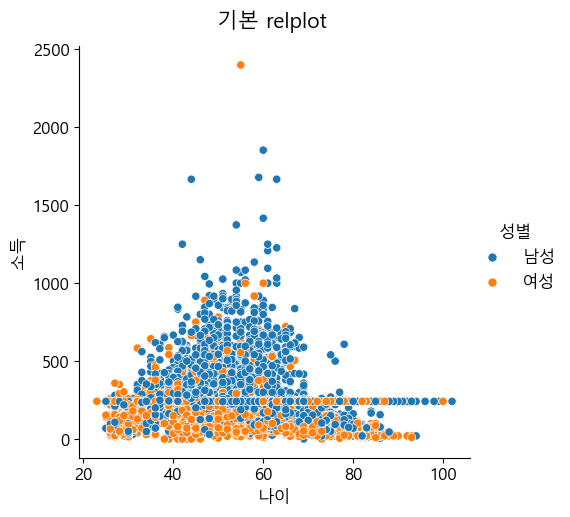

In [44]:
g = sns.relplot(x='나이', y='소득', hue='성별', data=welfare)
g.fig.suptitle('기본 relplot', y=1.03, fontsize=15)
FileSave()

seabornWelfare_24.png파일이 저장되었습니다.


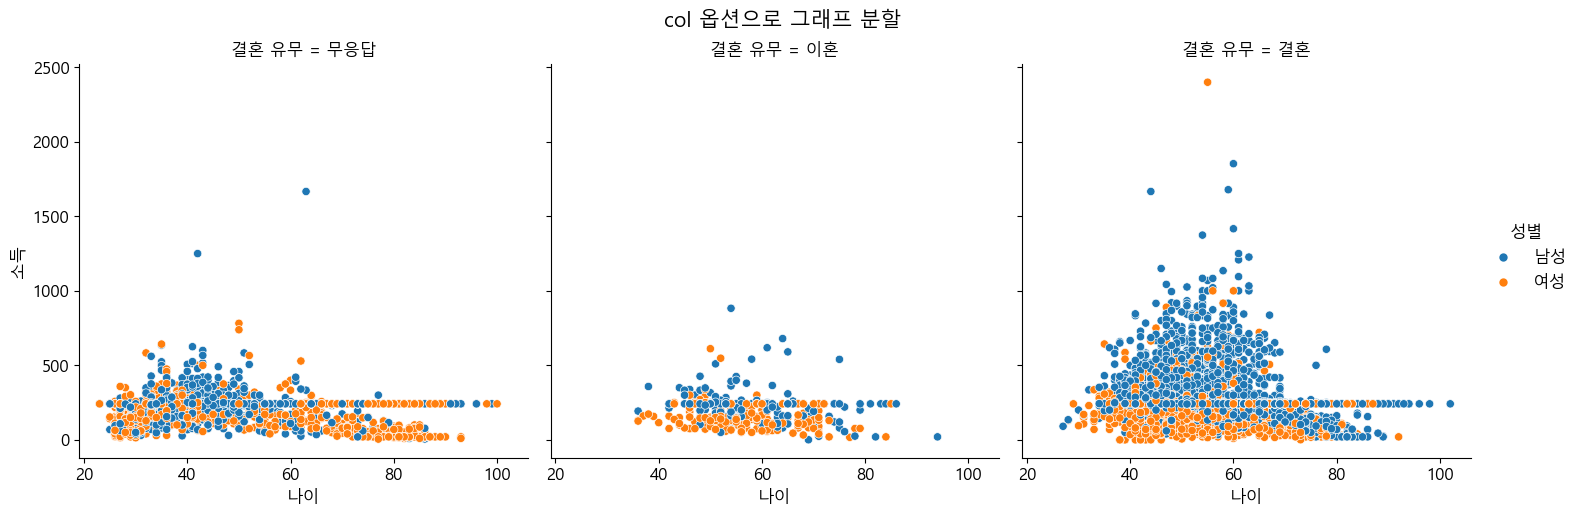

In [45]:
g = sns.relplot(x='나이', y='소득', hue='성별', col='결혼 유무', data=welfare)
g.fig.suptitle('col 옵션으로 그래프 분할', y=1.03, fontsize=15)
FileSave()

seabornWelfare_25.png파일이 저장되었습니다.


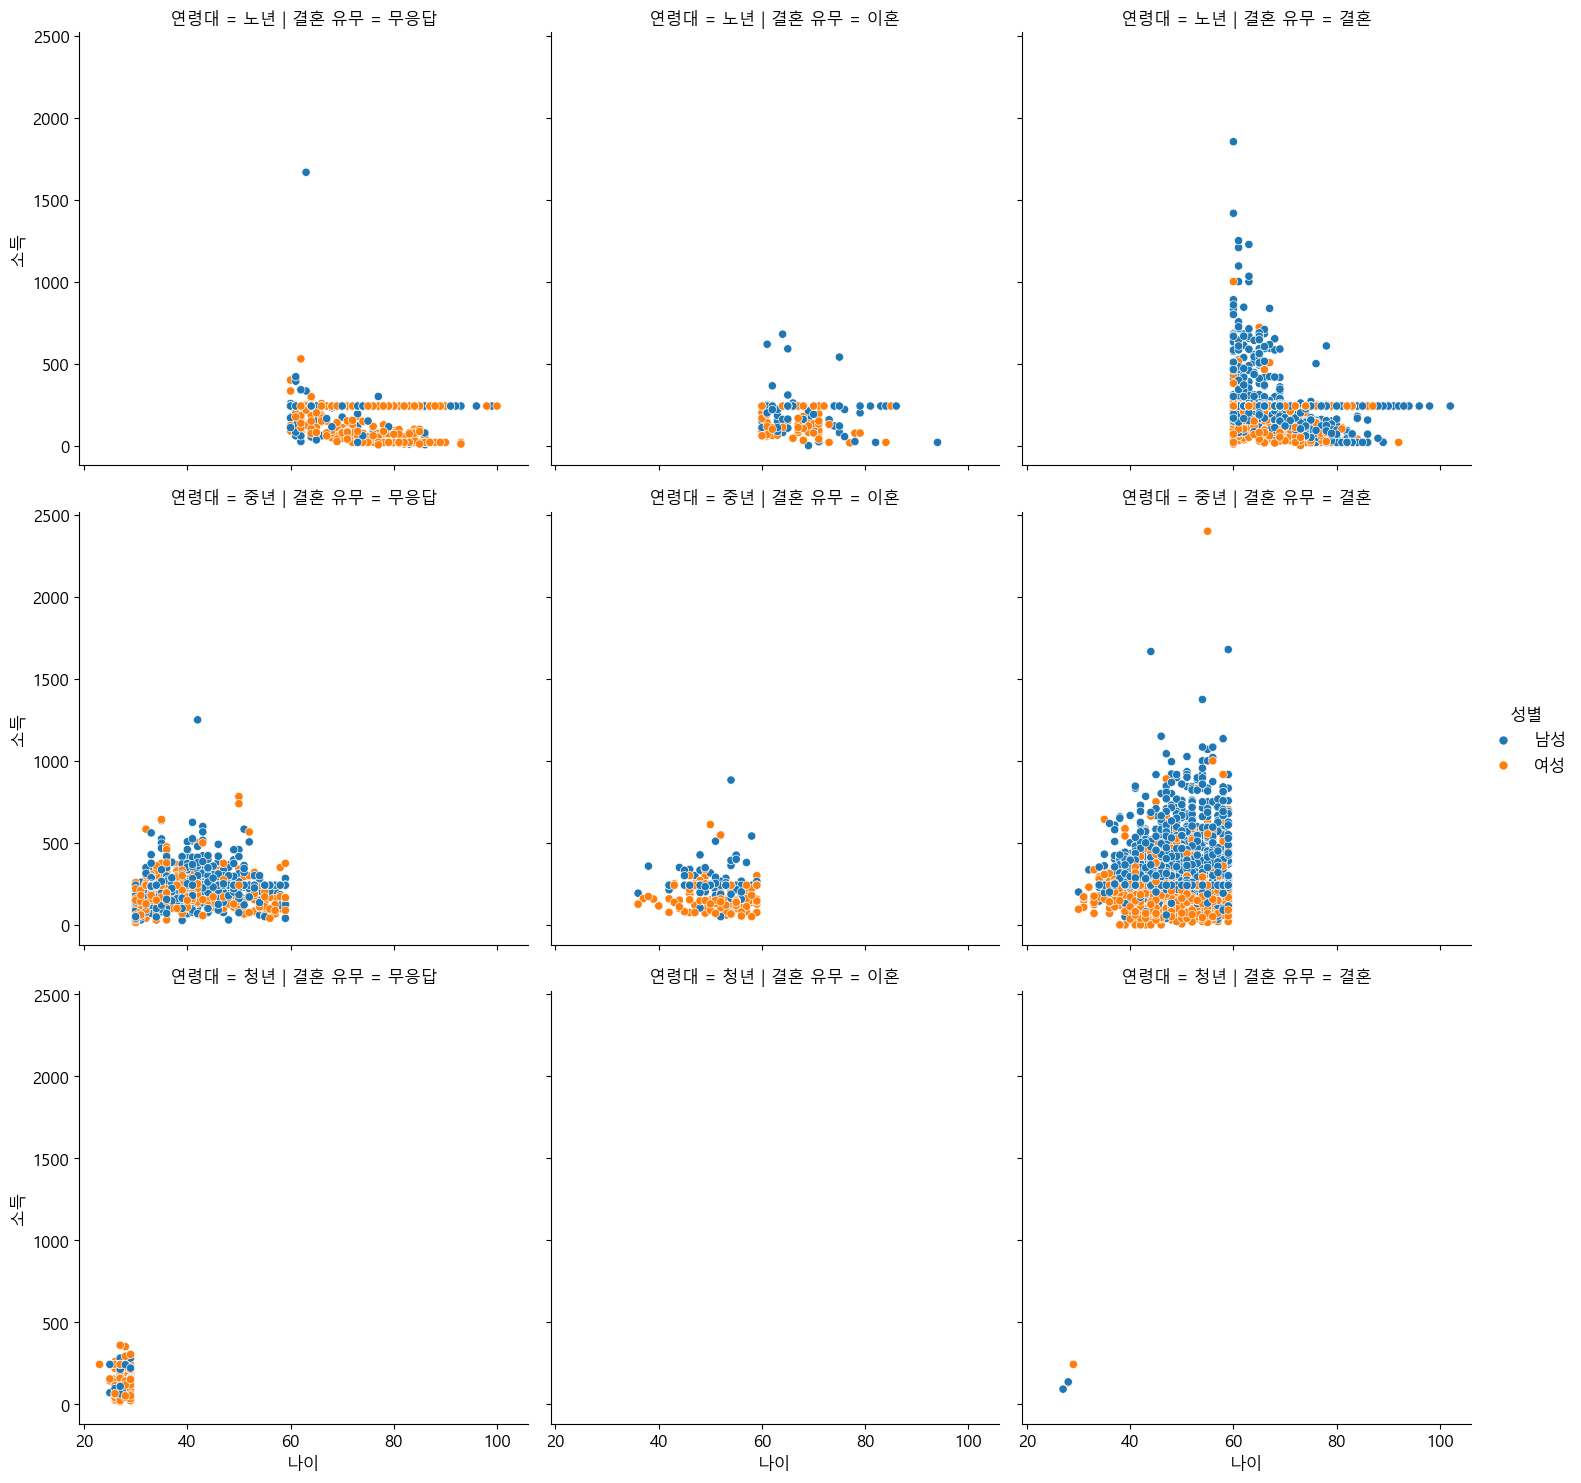

In [46]:
g = sns.relplot(x='나이', y='소득', hue='성별', row='연령대', col='결혼 유무', data=welfare)
FileSave()

seabornWelfare_26.png파일이 저장되었습니다.


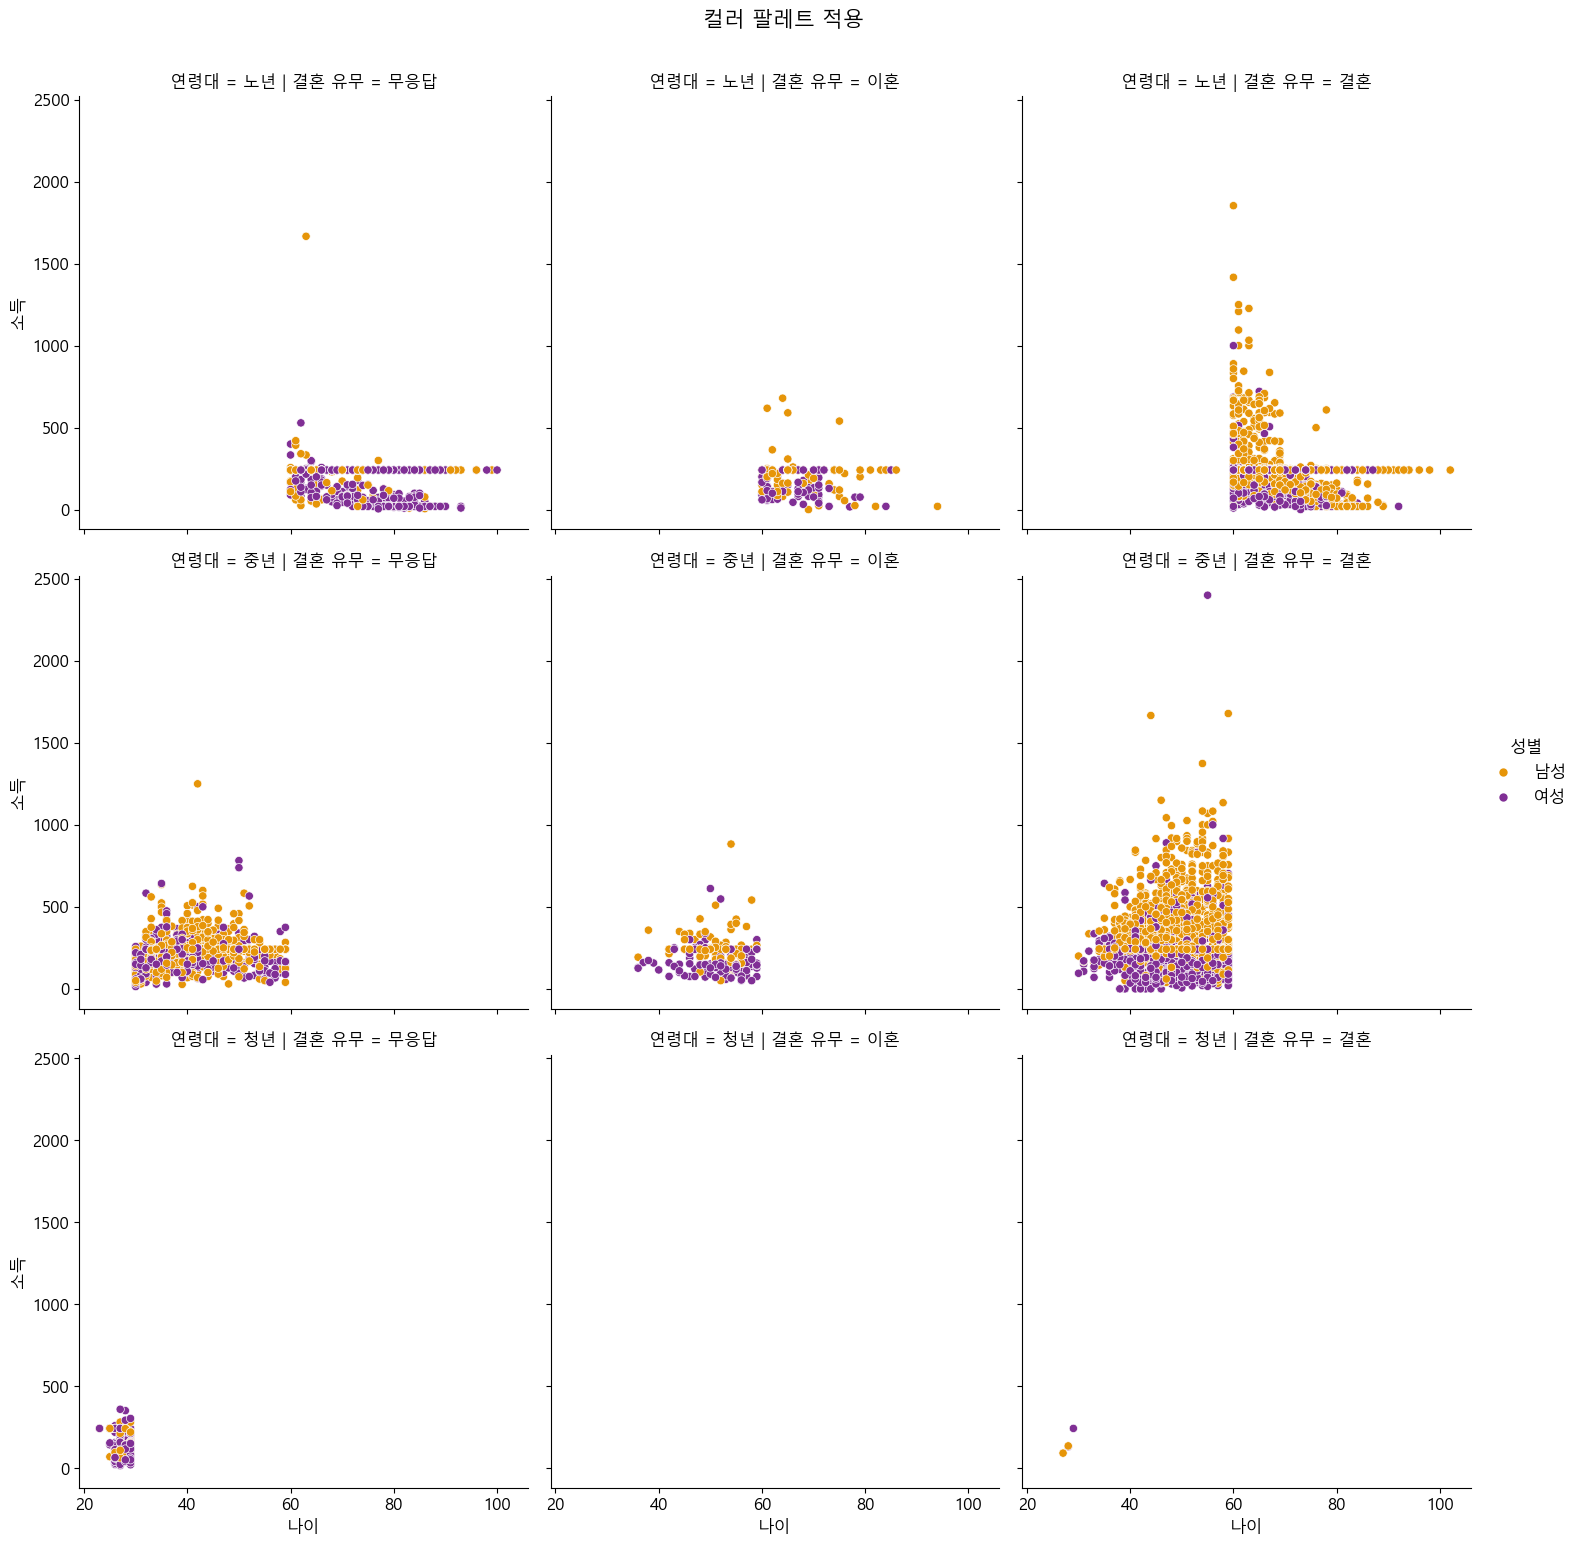

In [47]:
g = sns.relplot(x='나이', y='소득', hue='성별', row='연령대', col='결혼 유무', palette='CMRmap_r', data=welfare)
g.fig.suptitle('컬러 팔레트 적용', y=1.03, fontsize=15)
FileSave()

seabornWelfare_27.png파일이 저장되었습니다.


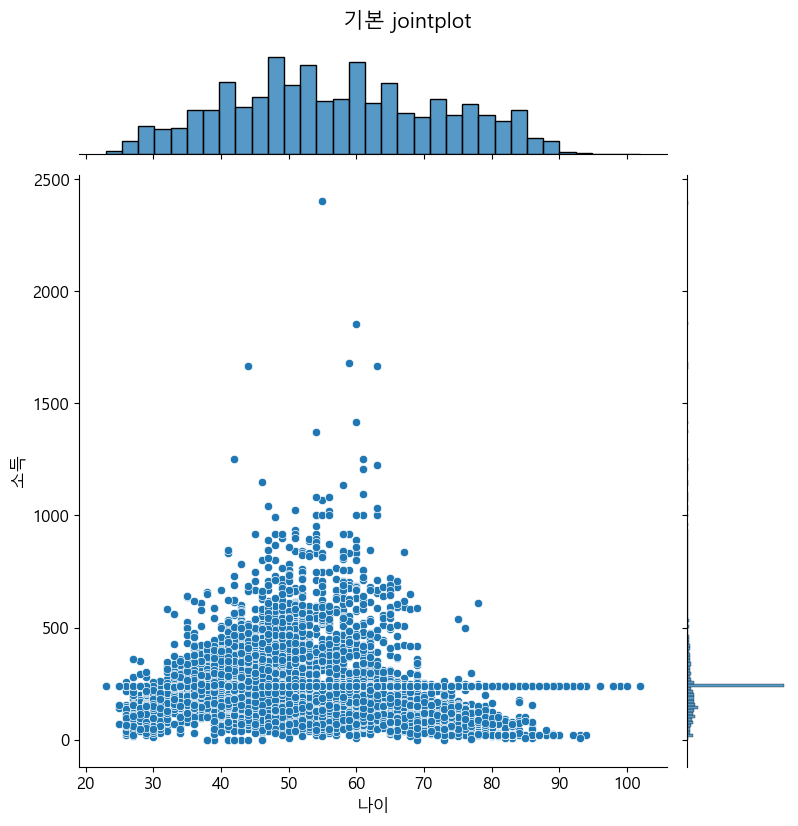

In [48]:
g = sns.jointplot(x='나이', y='소득', height=8, data=welfare)
g.fig.suptitle('기본 jointplot', y=1.03, fontsize=15)
FileSave()

seabornWelfare_28.png파일이 저장되었습니다.


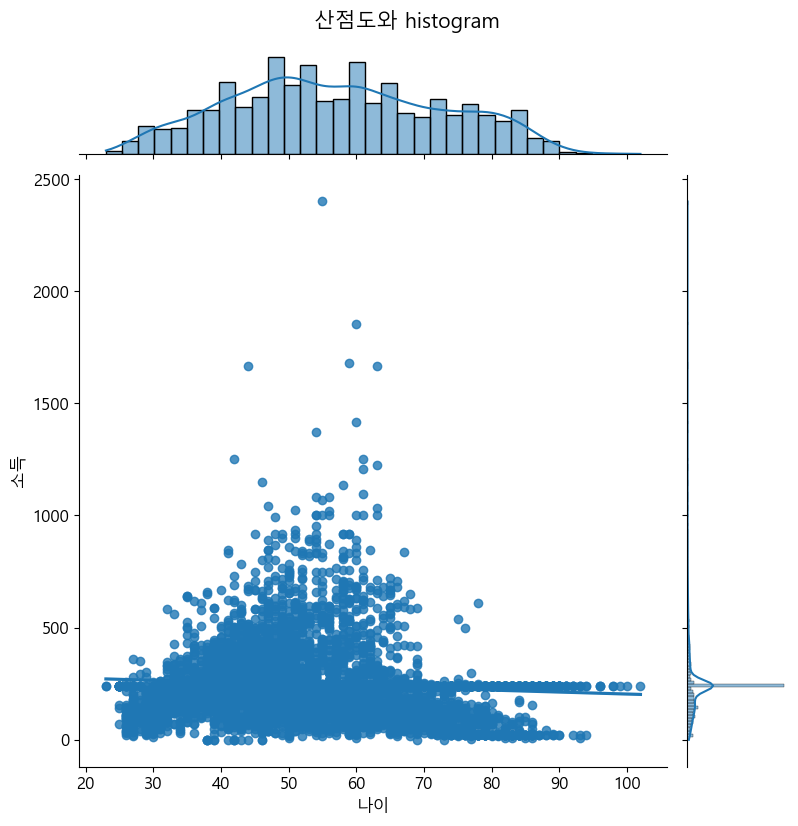

In [49]:
g = sns.jointplot(x='나이', y='소득',height=8, data=welfare, kind="reg")
g.fig.suptitle('산점도와 histogram', y=1.03, fontsize=15)
FileSave()

seabornWelfare_29.png파일이 저장되었습니다.


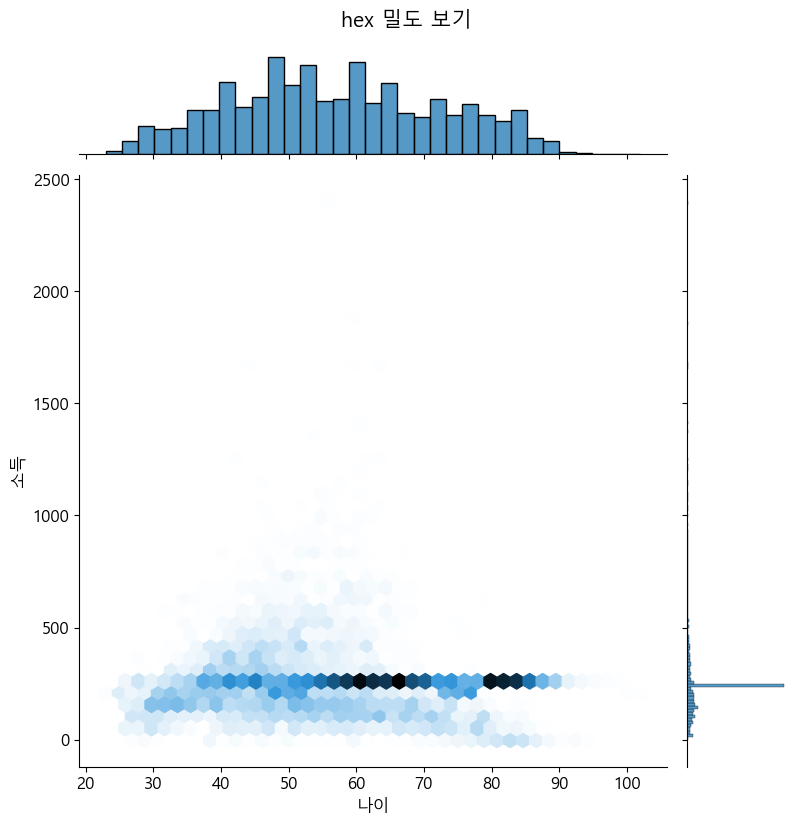

In [50]:
g = sns.jointplot(x='나이', y='소득',height=8, data=welfare, kind="hex")
g.fig.suptitle('hex 밀도 보기', y=1.03, fontsize=15)
FileSave()

seabornWelfare_30.png파일이 저장되었습니다.


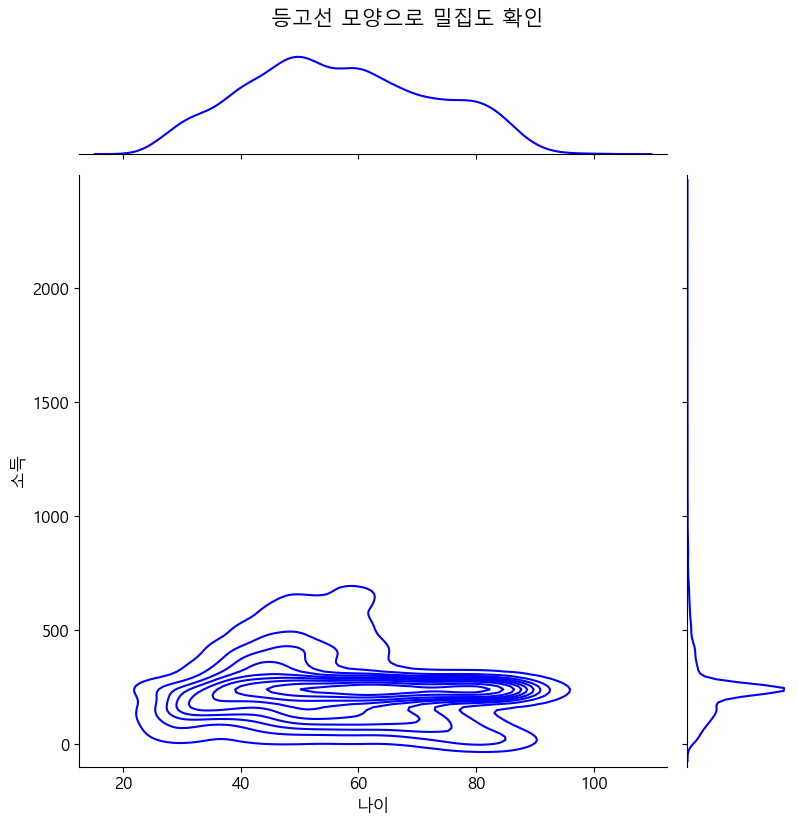

In [51]:
g = sns.jointplot(x='나이', y='소득',height=8, data=welfare, kind="kde", color="b")
g.fig.suptitle('등고선 모양으로 밀집도 확인', y=1.03, fontsize=15)
FileSave()

In [52]:
welfare[['소득', '나이']].describe()

,소득,나이
count,7529.000000,7529.000000
mean,241.619016,56.987913
std,144.679991,15.524029
min,0.000000,23.000000
25%,162.600000,45.000000
50%,241.619016,56.000000
75%,241.619016,69.000000
max,2400.000000,102.000000


seabornWelfare_31.png파일이 저장되었습니다.


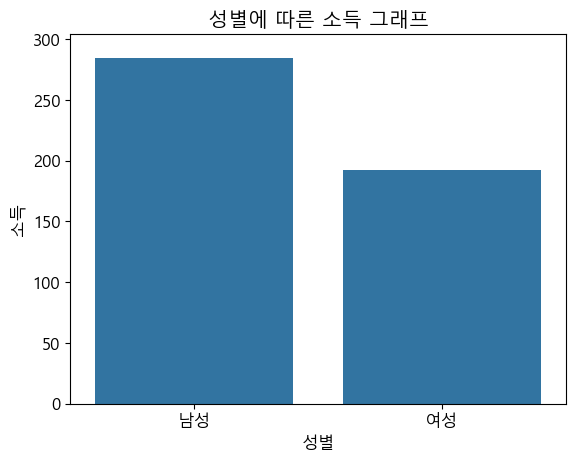

In [53]:
ax = plt.subplots
ax = sns.barplot(x='성별', y='소득', data=welfare, err_kws={'linewidth': 0})
ax.set_title('성별에 따른 소득 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')
FileSave()

seabornWelfare_32.png파일이 저장되었습니다.


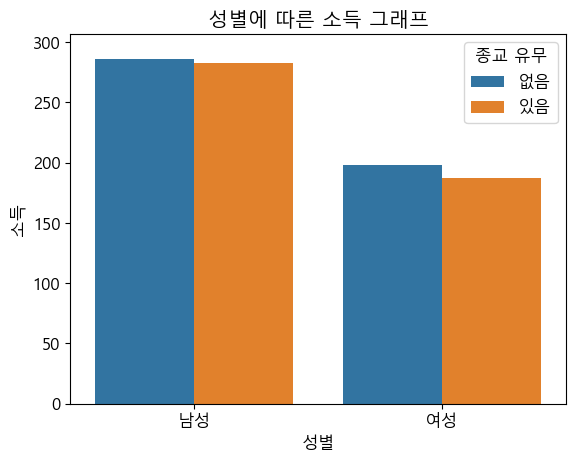

In [54]:
ax = plt.subplots
ax = sns.barplot(x='성별', y='소득', hue='종교 유무',data=welfare, err_kws={'linewidth': 0})
ax.set_title('성별에 따른 소득 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')
FileSave()

seabornWelfare_33.png파일이 저장되었습니다.


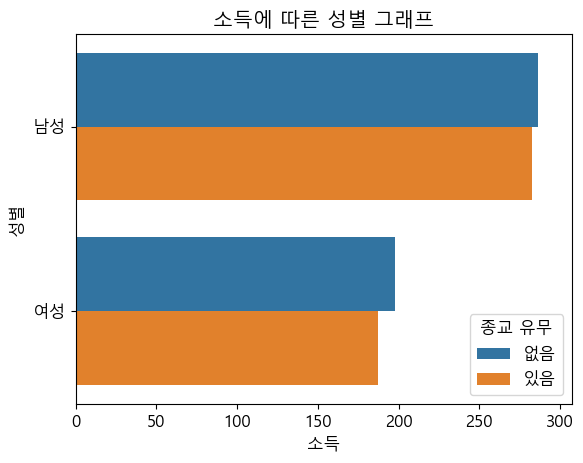

In [55]:
ax = plt.subplots
ax = sns.barplot(x='소득', y='성별', hue='종교 유무', data=welfare, err_kws={'linewidth': 0})
ax.set_title('소득에 따른 성별 그래프')
ax.set_ylabel('성별')
ax.set_xlabel('소득')
FileSave()

seabornWelfare_34.png파일이 저장되었습니다.


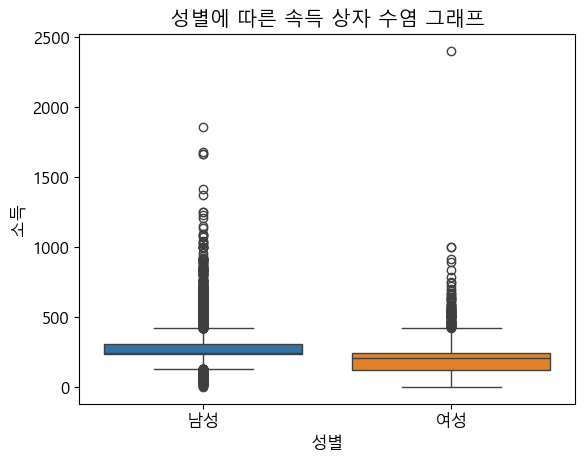

In [56]:
ax = plt.subplots()
ax = sns.boxplot(x='성별', y='소득', hue='성별', data=welfare)
ax.set_title('성별에 따른 속득 상자 수염 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')
FileSave()

seabornWelfare_35.png파일이 저장되었습니다.


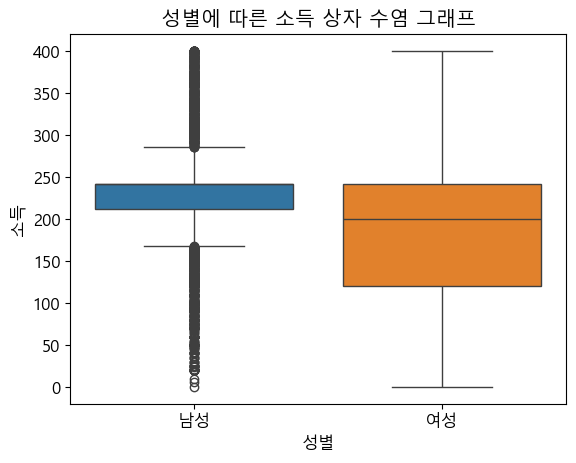

In [57]:
newwelfare = welfare.loc[welfare['소득'] <= 400]
ax = plt.subplots()
ax = sns.boxplot(x='성별', y='소득', hue='성별', data=newwelfare)
ax.set_title('성별에 따른 소득 상자 수염 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')
FileSave()

seabornWelfare_36.png파일이 저장되었습니다.


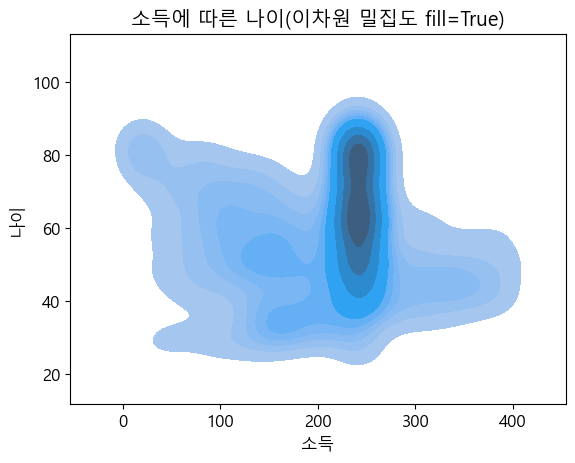

In [58]:
#kde, ax = plt.subplots()
#ax = sns.kdeplot(data=newwelfare['소득'],
#                 data2=newwelfare['나이'],
#                 shade=True)
# -----------      update        -----------------------

fig, ax = plt.subplots()
sns.kdeplot(data=newwelfare,
            x='소득',
            y='나이',
            fill=True,
            ax=ax)
ax.set_title('소득에 따른 나이(이차원 밀집도 fill=True)')
ax.set_xlabel('소득')
ax.set_ylabel('나이')
FileSave()

seabornWelfare_37.png파일이 저장되었습니다.


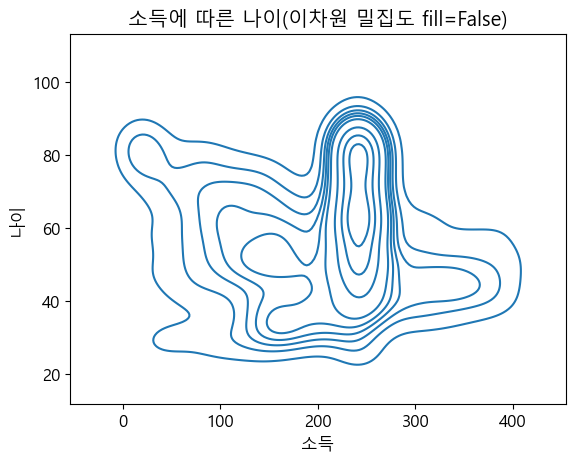

In [59]:
fig, ax = plt.subplots()
sns.kdeplot(data=newwelfare,
            x='소득',
            y='나이',
            fill=False,
            ax=ax)
ax.set_title('소득에 따른 나이(이차원 밀집도 fill=False)')
ax.set_xlabel('소득')
ax.set_ylabel('나이')
FileSave()